In [1]:
# imports

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

In [2]:
# loading data into dataframe  - task1
toyota_df = pd.read_csv('/Users/anilthapa/Documents/Datasets/Data-Science Class/toyota.csv')

In [3]:
# general over view of the dataframe
toyota_df.head(n = 8)

model    year    price transmission  mileage fuelType    tax   mpg  \
0   GT86  2016.0  16000.0       Manual  24089.0   Petrol  265.0  36.2   
1   GT86  2017.0  15995.0       Manual  18615.0   Petrol  145.0  36.2   
2   GT86  2015.0  13998.0       Manual  27469.0   Petrol  265.0  36.2   
3   GT86  2017.0  18998.0       Manual  14736.0   Petrol  150.0  36.2   
4   GT86  2017.0  17498.0       Manual  36284.0   Petrol  145.0  36.2   
5   GT86  2017.0  15998.0       Manual  26919.0   Petrol  260.0  36.2   
6   GT86  2017.0  18522.0       Manual  10456.0   Petrol  145.0  36.2   
7   GT86  2017.0  18995.0       Manual  12340.0   Petrol  145.0  36.2   

   engineSize  
0         2.0  
1         2.0  
2         2.0  
3         2.0  
4         2.0  
5         2.0  
6         2.0  
7         2.0

In [4]:
# check the null values 
toyota_df.isnull().any()

model           True
year            True
price           True
transmission    True
mileage         True
fuelType        True
tax             True
mpg             True
engineSize      True
dtype: bool

It seems that every input columns have missing values

In [5]:
missing_value_index = toyota_df[toyota_df.isnull().any(axis = 1)].index
print(missing_value_index)

Index([307, 807, 1196, 1411, 2987, 2991, 4743, 6223, 6597], dtype='int64')


These are the index of missing values

In [6]:
missing_value_record = toyota_df.loc[missing_value_index]
missing_value_record

model    year    price transmission  mileage fuelType    tax   mpg  \
307    Corolla     NaN  25990.0    Automatic   1112.0      NaN  135.0  53.3   
807       RAV4  2015.0      NaN          NaN  45000.0   Diesel   78.0  45.0   
1196     Yaris     NaN  10698.0       Manual      NaN      NaN   30.0  55.0   
1411     Yaris     NaN   7295.0       Manual      NaN      NaN   30.0  58.0   
2987     Auris     NaN  15990.0          NaN  12300.0   Hybrid  135.0  80.7   
2991     Auris  2014.0  11490.0    Automatic  48125.0   Hybrid    0.0   NaN   
4743       NaN  2017.0      NaN       Manual  41600.0   Petrol    0.0  68.9   
6223     Prius     NaN      NaN    Automatic  33875.0   Hybrid    NaN   NaN   
6597     Hilux     NaN  30500.0          NaN      NaN   Diesel  260.0   NaN   

      engineSize  
307          NaN  
807          2.0  
1196         1.3  
1411         NaN  
2987         1.8  
2991         1.8  
4743         1.0  
6223         NaN  
6597         2.4

Our strategy here is simple. That is if the record contains more than one missing value.
We can drop the record. Given that we have enough number of records, we do not have to worry about dropping few number of records

In [12]:
toyota_df.dropna(thresh = len(toyota_df.columns)-1, inplace=True)

Here we have dropped all the records that contain more than one null values

In [14]:
# checking if we still have null values
toyota_df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg              True
engineSize      False
dtype: bool

There is still one null values in the dataframe. However, we do not have to worry about it. We can now go forth and drop it too.

In [15]:
toyota_df.dropna(inplace=True)

In [16]:
toyota_df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

Now our dataset if free of null values

In [17]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6730 entries, 0 to 6738
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6730 non-null   object 
 1   year          6730 non-null   float64
 2   price         6730 non-null   float64
 3   transmission  6730 non-null   object 
 4   mileage       6730 non-null   float64
 5   fuelType      6730 non-null   object 
 6   tax           6730 non-null   float64
 7   mpg           6730 non-null   float64
 8   engineSize    6730 non-null   float64
dtypes: float64(6), object(3)
memory usage: 525.8+ KB


In [18]:
toyota_df.describe()

year         price        mileage         tax          mpg  \
count  6730.000000   6730.000000    6730.000000  6730.00000  6730.000000   
mean   2016.747697  12518.219614   22858.243982    94.72214    63.044473   
std       2.204226   6341.555181   19128.421176    73.85846    15.821234   
min    1998.000000    850.000000       2.000000     0.00000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.00000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.00000    62.800000   
75%    2018.000000  14995.000000   31059.750000   145.00000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.00000   235.000000   

        engineSize  
count  6730.000000  
mean      1.471055  
std       0.436120  
min       0.000000  
25%       1.000000  
50%       1.500000  
75%       1.800000  
max       4.500000

In [21]:
# Now handling duplicates values
duplicates = toyota_df.duplicated()
toyota_df[duplicates]

model    year    price transmission  mileage fuelType    tax   mpg  \
178    Corolla  2019.0  17960.0       Manual   4500.0   Petrol  145.0  39.2   
286    Corolla  2019.0  15991.0       Manual     10.0   Petrol  145.0  39.2   
397       RAV4  2016.0  17495.0    Automatic  58100.0   Hybrid   20.0  55.4   
398       RAV4  2017.0  16295.0       Manual  34633.0   Diesel  125.0  60.1   
446       RAV4  2014.0  10999.0       Manual  57942.0   Diesel  145.0  53.0   
459       RAV4  2015.0  13500.0       Manual  45757.0   Diesel  125.0  57.6   
460       RAV4  2015.0  13500.0       Manual  45757.0   Diesel  125.0  57.6   
764       RAV4  2016.0  18795.0    Automatic  57000.0   Hybrid   20.0  55.4   
1179     Yaris  2016.0  10495.0    Automatic  33705.0   Hybrid    0.0  86.0   
1415     Yaris  2016.0   9495.0    Automatic  26191.0   Petrol   30.0  58.0   
1588     Yaris  2020.0  14769.0       Manual     25.0   Petrol  150.0  47.9   
1965     Yaris  2019.0  12495.0    Automatic   6000.0   Petrol  145.0  47.9   
2162     Yaris  2019.0  14495.0       Manual    100.0   Petrol  145.0  47.9   
2946     Auris  2016.0   9985.0       Manual  27600.0   Petrol   30.0  58.9   
3178     Auris  2016.0   8992.0       Manual  40323.0   Diesel   20.0  67.3   
3231     Auris  2013.0   6622.0       Manual  41959.0   Petrol  145.0  47.9   
3779      Aygo  2019.0   9495.0       Manual   1360.0   Petrol  145.0  56.5   
3837      Aygo  2016.0   8450.0       Manual  12935.0   Petrol    0.0  69.0   
3903      Aygo  2019.0  10000.0       Manual   1000.0   Petrol  145.0  57.7   
3949      Aygo  2019.0   9295.0       Manual   5000.0   Petrol  145.0  57.7   
4060      Aygo  2019.0   8495.0       Manual   5519.0   Petrol  145.0  56.5   
4284      Aygo  2019.0   9995.0       Manual     25.0   Petrol  145.0  56.5   
4285      Aygo  2019.0   9995.0       Manual     25.0   Petrol  145.0  56.5   
4302      Aygo  2019.0  10495.0       Manual   3500.0   Petrol  145.0  56.5   
4331      Aygo  2017.0   6550.0       Manual  17047.0   Petrol    0.0  69.0   
4453      Aygo  2017.0   6850.0       Manual  18898.0   Petrol  150.0  68.9   
4517      Aygo  2019.0   9999.0       Manual   1500.0   Petrol  145.0  56.5   
4518      Aygo  2019.0   9999.0       Manual   1500.0   Petrol  145.0  56.5   
4604      Aygo  2019.0   9990.0       Manual   5000.0   Petrol  145.0  57.7   
5085      Aygo  2018.0   9831.0       Manual  10742.0   Petrol  145.0  56.5   
5195      Aygo  2019.0  10995.0       Manual      3.0   Petrol  145.0  57.7   
5213      Aygo  2019.0   9391.0       Manual      3.0   Petrol  145.0  56.5   
5343      Aygo  2019.0   9999.0       Manual     20.0   Petrol  145.0  57.7   
5489      Aygo  2019.0  10350.0       Manual   2000.0   Petrol  145.0  57.7   
5490      Aygo  2019.0  10350.0       Manual   2000.0   Petrol  145.0  57.7   
5494      Aygo  2019.0  10000.0       Manual    150.0   Petrol  145.0  57.7   
5561      Aygo  2019.0  10750.0       Manual     32.0   Petrol  145.0  57.7   
6358   Avensis  2017.0  10595.0       Manual  35939.0   Diesel  145.0  67.3   
6571     Hilux  2015.0  14995.0    Automatic  72100.0   Diesel  260.0  32.8   

      engineSize  
178          1.2  
286          1.2  
397          2.5  
398          2.0  
446          2.0  
459          2.0  
460          2.0  
764          2.5  
1179         1.5  
1415         1.3  
1588         1.5  
1965         1.5  
2162         1.5  
2946         1.2  
3178         1.6  
3231         1.6  
3779         1.0  
3837         1.0  
3903         1.0  
3949         1.0  
4060         1.0  
4284         1.0  
4285         1.0  
4302         1.0  
4331         1.0  
4453         1.0  
4517         1.0  
4518         1.0  
4604         1.0  
5085         1.0  
5195         1.0  
5213         1.0  
5343         1.0  
5489         1.0  
5490         1.0  
5494         1.0  
5561         1.0  
6358         1.6  
6571         3.0

After going through it, the only duplicated value are:
    - 459 & 460
    - 4283 & 4284 
    - 4516 & 4517
    - 5488 & 5489
The rest are not duplicates value but different observations. Dropping only these duplicated values

In [22]:
index_to_drop =[460, 4284, 4517, 5489]
toyota_df.drop(index_to_drop, inplace=True)

In [101]:
toyota_df.drop(toyota_df[toyota_df['engineSize'] == 0].index, inplace=True)

From our domain knowledge, there is no engineSize of value 0. So, we drop the record where the enginesize is 0.

In [113]:
toyota_df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [115]:
toyota_df.drop(toyota_df[toyota_df['transmission'] == 'Other'].index, inplace= True)

Here we can drop Other types of transmission. Because we are dealing with toyota engines. They majority of engines comes from only three options: Manual, Automatic, Semi-Auto

In [23]:
toyota_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [39]:
toyota_df = toyota_df[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType','engineSize', 
       'mpg']]

Rearranging our columns in a dataframe because it appears that mpg is our target variable. Further, we dropped tax columns because it can be derived from price column

In [40]:
# Now creating box plot of the numerical features
numerical_features = ['year', 'price', 'mileage', 'engineSize', 'mpg']

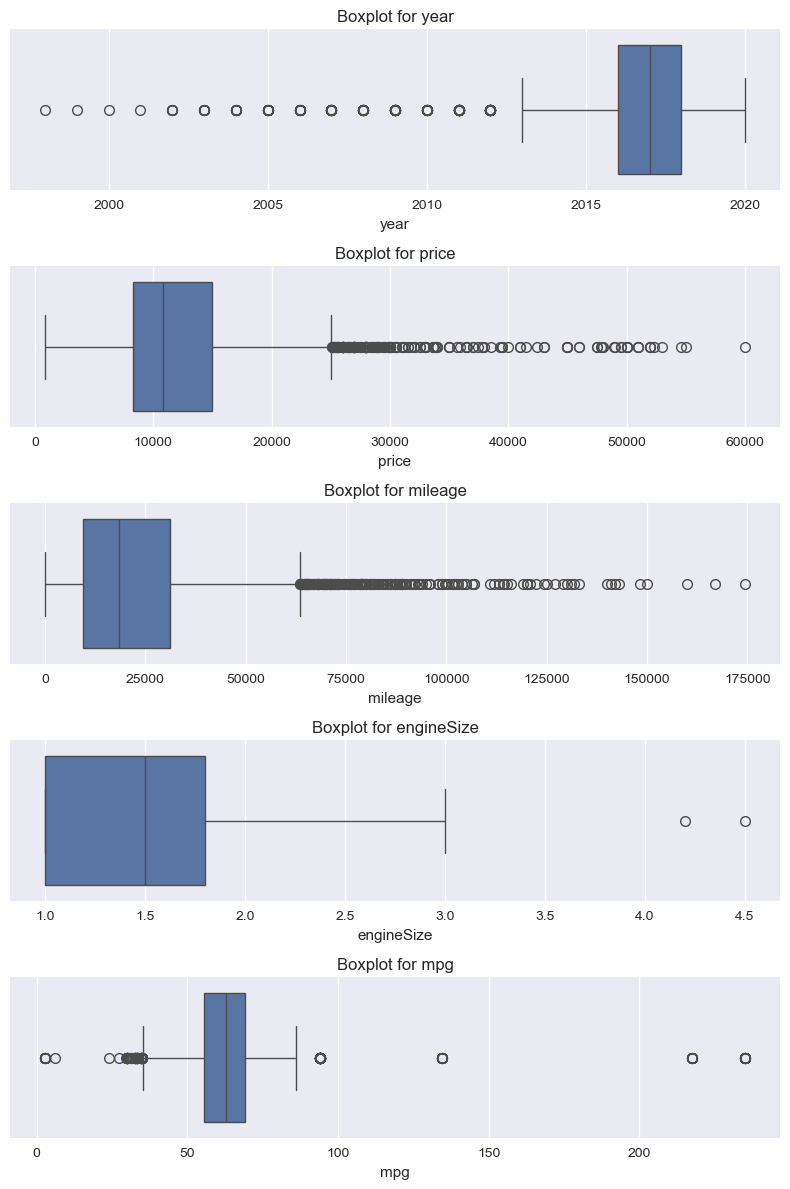

In [116]:
fig1, ax1 = plt.subplots(nrows= 5, ncols=1, figsize = (8,12))
for i, feature in enumerate(numerical_features):
    sns.boxplot(toyota_df[feature], orient='h', ax = ax1[i])
    ax1[i].set_xlabel(feature)
    ax1[i].set_title('Boxplot for '+feature)

plt.tight_layout()
plt.show()

In [ ]:
drop the null values

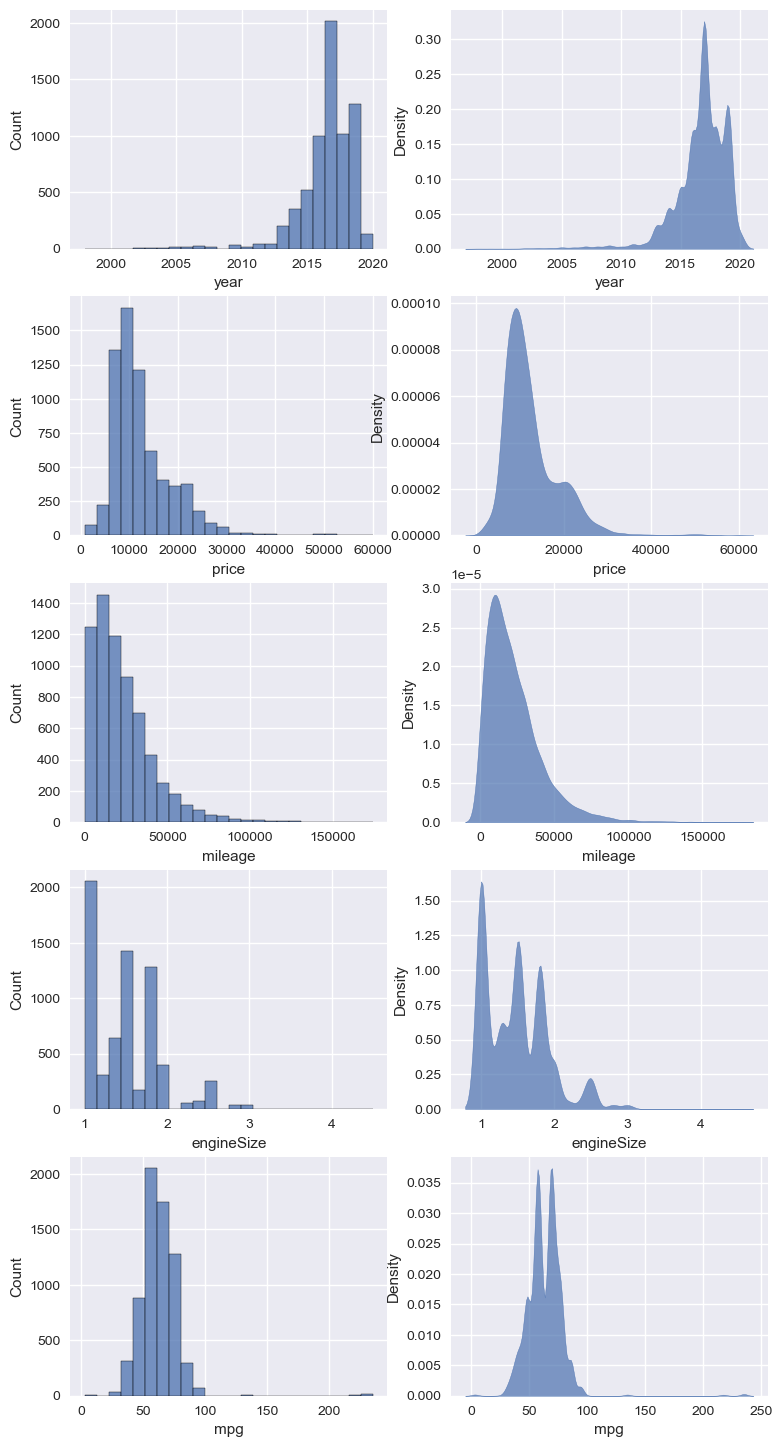

In [117]:
fig2, ax2 = plt.subplots(nrows=5, ncols=2, figsize = (9, 18))
for i, feature in enumerate(numerical_features):
    sns.histplot(toyota_df[feature], bins = 24, ax = ax2[i, 0])
    sns.kdeplot(toyota_df[feature], fill=True, alpha = 0.7, ax = ax2[i, 1])
    
#plt.tight_layout()
plt.show()

In [68]:
# now seeing the categorical features
categorical_features = toyota_df[['model', 'transmission', 'fuelType']]

In [69]:
categorical_features['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [70]:
categorical_features['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [71]:
categorical_features['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

['year', 'price', 'mileage', 'engineSize', 'mpg']

<Axes: >

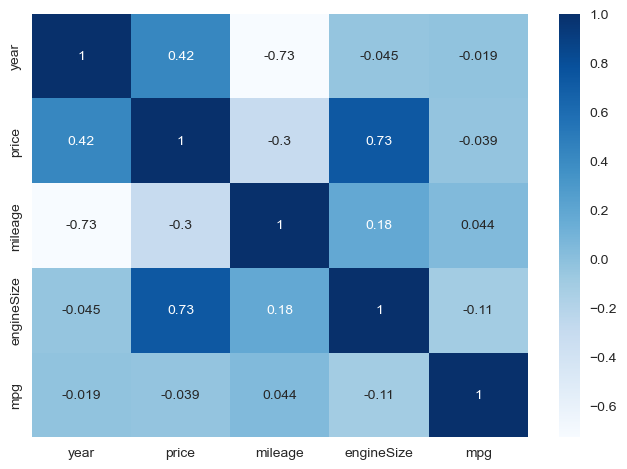

In [118]:
toyota_numerical = toyota_df[['year', 'price', 'mileage', 'engineSize', 'mpg']]
sns.heatmap(toyota_numerical.corr(), annot=True, cmap='Blues')

From the above seaborn heatmap, it is clear that there is a positive correlation between engine size and the pirce of e vehicle. It also seems that there is negative correlation between mileage and year of the vehicle.

In [106]:
toyota_df.head()

model    year    price transmission  mileage fuelType  engineSize   mpg
0   GT86  2016.0  16000.0       Manual  24089.0   Petrol         2.0  36.2
1   GT86  2017.0  15995.0       Manual  18615.0   Petrol         2.0  36.2
2   GT86  2015.0  13998.0       Manual  27469.0   Petrol         2.0  36.2
3   GT86  2017.0  18998.0       Manual  14736.0   Petrol         2.0  36.2
4   GT86  2017.0  17498.0       Manual  36284.0   Petrol         2.0  36.2

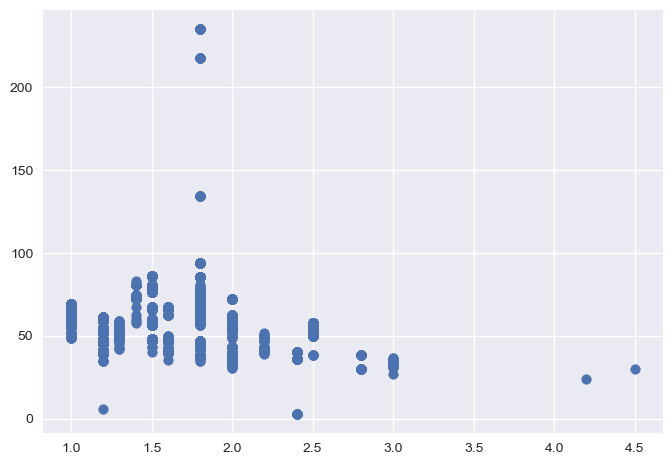

In [126]:
plt.scatter(toyota_df['engineSize'], toyota_df['mpg'])

In [127]:
toyota_df

model    year    price transmission  mileage fuelType  \
0               GT86  2016.0  16000.0       Manual  24089.0   Petrol   
1               GT86  2017.0  15995.0       Manual  18615.0   Petrol   
2               GT86  2015.0  13998.0       Manual  27469.0   Petrol   
3               GT86  2017.0  18998.0       Manual  14736.0   Petrol   
4               GT86  2017.0  17498.0       Manual  36284.0   Petrol   
...              ...     ...      ...          ...      ...      ...   
6734              IQ  2011.0   5500.0    Automatic  30000.0   Petrol   
6735   Urban Cruiser  2011.0   4985.0       Manual  36154.0   Petrol   
6736   Urban Cruiser  2012.0   4995.0       Manual  46000.0   Diesel   
6737   Urban Cruiser  2011.0   3995.0       Manual  60700.0   Petrol   
6738   Urban Cruiser  2011.0   4495.0       Manual  45128.0   Petrol   

      engineSize   mpg  
0            2.0  36.2  
1            2.0  36.2  
2            2.0  36.2  
3            2.0  36.2  
4            2.0  36.2  
...          ...   ...  
6734         1.0  58.9  
6735         1.3  50.4  
6736         1.4  57.6  
6737         1.3  50.4  
6738         1.3  50.4  

[6719 rows x 8 columns]

In [129]:
X = toyota_df[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize']]
y = toyota_df['mpg']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [132]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error', mean_absolute_error(y_test, y_predict))
print('Mean Squared Error', mean_squared_error(y_test, y_predict))